In [1]:
import functions, dataframe_cleaning
functions.import_all(globals())
df = dataframe_cleaning.clean(df)

In [2]:
#Ah, clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                  21597 non-null int64
date                21597 non-null int64
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null float64
yr_built            21597 non-null int64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
waterfront_False    21597 non-null uint8
waterfront_True     21597 non-null uint8
dtypes: float64(

In [4]:
#start with a basic OLS model using all the data blindly
sm.OLS(df.price,sm.add_constant(df.drop(["price"],axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2529.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:05:50   Log-Likelihood:            -2.9435e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21576   BIC:                         5.889e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.715e+07    9.4e+06     -8.205      0.000   -9.56e+07   -5.87e+07
id               -1.367e-06   4.82e-07     -2.836      0.005   -2.31e-06   -4.22e-07
date               115.5314     12.136      9.520      0.000      91.744     139.319
bedrooms         -3.633e+04   1897.092    -19.153      0.000   -4.01e+04   -3.26e+04
bathrooms         4.427e+04   3234.820     13.685      0.000    3.79e+04    5.06e+04
sqft_living        104.9244     18.050      5.813      0.000      69.544     140.304
sqft_lot             0.1148      0.048      2.396      0.017       0.021       0.209
floors            8500.6956   3592.466      2.366      0.018    1459.196    1.55e+04
view              5.367e+04   2120.674     25.307      0.000    4.95e+04    5.78e+04
condition         2.581e+04   2318.785     11.130      0.000    2.13e+04    3.04e+04
grade             9.782e+04   2156.974     45.351      0.000    9.36e+04    1.02e+05
sqft_above          75.5252     18.041      4.186      0.000      40.163     110.887
sqft_basement       45.7671     17.881      2.560      0.010      10.719      80.816
yr_built         -2764.6987     68.823    -40.171      0.000   -2899.596   -2629.801
zipcode           -586.4491     32.939    -17.804      0.000    -651.013    -521.886
lat               6.005e+05   1.07e+04     56.019      0.000    5.79e+05    6.21e+05
long             -2.118e+05   1.32e+04    -16.103      0.000   -2.38e+05   -1.86e+05
sqft_living15       20.7783      3.443      6.036      0.000      14.031      27.526
sqft_lot15          -0.3982      0.073     -5.424      0.000      -0.542      -0.254
waterfront_False  3326.0995   4374.861      0.760      0.447   -5248.952    1.19e+04
waterfront_True   6.247e+05   1.85e+04     33.809      0.000    5.88e+05    6.61e+05
==============================================================================
Omnibus:                    18416.822   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1878683.698
Skew:                           3.580   Prob(JB):                         0.00
Kurtosis:                      48.127   Cond. No.                     3.72e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#starting with a basic model of everything, it seems that we got a pretty high r2 value already.
#what if I remove waterfront false? It has a large p value
remove_these_cols = ["price","waterfront_False"]
sm.OLS(df.price,sm.add_constant(df.drop(remove_these_cols,axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2662.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:06:23   Log-Likelihood:            -2.9435e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21577   BIC:                         5.889e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.712e+07    9.4e+06     -8.202      0.000   -9.55e+07   -5.87e+07
id              -1.362e-06   4.82e-07     -2.826      0.005   -2.31e-06   -4.17e-07
date              115.5232     12.136      9.519      0.000      91.736     139.311
bedrooms        -3.633e+04   1897.072    -19.152      0.000   -4.01e+04   -3.26e+04
bathrooms        4.426e+04   3234.786     13.684      0.000    3.79e+04    5.06e+04
sqft_living       105.0310     18.050      5.819      0.000      69.652     140.410
sqft_lot            0.1146      0.048      2.391      0.017       0.021       0.209
floors           8499.6777   3592.431      2.366      0.018    1458.248    1.55e+04
view             5.363e+04   2120.088     25.297      0.000    4.95e+04    5.78e+04
condition        2.581e+04   2318.761     11.131      0.000    2.13e+04    3.04e+04
grade            9.783e+04   2156.928     45.355      0.000    9.36e+04    1.02e+05
sqft_above         75.4320     18.041      4.181      0.000      40.071     110.793
sqft_basement      45.6549     17.880      2.553      0.011      10.608      80.702
yr_built        -2764.7728     68.822    -40.173      0.000   -2899.669   -2629.876
zipcode          -586.7461     32.937    -17.814      0.000    -651.305    -522.188
lat              6.004e+05   1.07e+04     56.018      0.000    5.79e+05    6.21e+05
long            -2.119e+05   1.31e+04    -16.112      0.000   -2.38e+05   -1.86e+05
sqft_living15      20.7708      3.442      6.034      0.000      14.023      27.518
sqft_lot15         -0.3977      0.073     -5.417      0.000      -0.542      -0.254
waterfront_True  6.219e+05   1.81e+04     34.365      0.000    5.86e+05    6.57e+05
==============================================================================
Omnibus:                    18418.064   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1879274.213
Skew:                           3.580   Prob(JB):                         0.00
Kurtosis:                      48.134   Cond. No.                     3.72e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

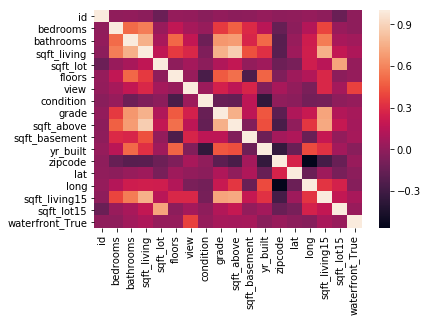

In [13]:
#interestingly enough it did not affect the r2, indicating it was an unnecesary feature
#What about strongly correlated features?
sns.heatmap(df.drop(remove_these_cols,axis=1).corr())

In [70]:
sorted_correlations = pd.DataFrame(df.drop("price",axis=1).corr().stack().sort_values(ascending=False))

In [71]:
row = sorted_correlations.iloc[0]
row.name[0]


'waterfront_True'

In [72]:
the_same = sorted_correlations.apply(lambda row : row.name[0] == row.name[1],axis=1)

In [73]:
type(the_same)

pandas.core.series.Series

In [74]:
the_same.head()

waterfront_True  waterfront_True    True
grade            grade              True
sqft_living15    sqft_living15      True
long             long               True
lat              lat                True
dtype: bool

In [76]:
cleaned_corr = sorted_correlations[the_same!=True]

In [84]:
cleaned_corr[:20].unstack().isna().sum()

0  sqft_living      3
   sqft_above       3
   grade            3
   sqft_living15    4
   bathrooms        4
   sqft_lot         6
   sqft_lot15       6
dtype: int64

In [85]:
#so if I am removing from these features due to their correlation, the bottom four features have the least correlated features so I will be keeping them
cleaned_corr[:20].unstack()

0                                               \
              sqft_living sqft_above     grade sqft_living15 bathrooms   
sqft_above       0.876448        NaN  0.756073      0.731767  0.686668   
sqft_living           NaN   0.876448  0.762779      0.756402  0.755758   
grade            0.762779   0.756073       NaN      0.713867  0.665838   
sqft_living15    0.756402   0.731767  0.713867           NaN       NaN   
bathrooms        0.755758   0.686668  0.665838           NaN       NaN   
sqft_lot15            NaN        NaN       NaN           NaN       NaN   
sqft_lot              NaN        NaN       NaN           NaN       NaN   

                                    
               sqft_lot sqft_lot15  
sqft_above          NaN        NaN  
sqft_living         NaN        NaN  
grade               NaN        NaN  
sqft_living15       NaN        NaN  
bathrooms           NaN        NaN  
sqft_lot15     0.718204        NaN  
sqft_lot            NaN   0.718204

In [88]:
#I also must remove sqft lot 15 or sqft lot. Which is more predictive?
sm.OLS(df.price,sm.add_constant(df["sqft_lot15"])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     149.2
Date:                Tue, 07 May 2019   Prob (F-statistic):           3.30e-34
Time:                        10:40:08   Log-Likelihood:            -3.0732e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.261e+05   2750.361    191.269      0.000    5.21e+05    5.31e+05
sqft_lot15     1.1159      0.091     12.216      0.000       0.937       1.295
==============================================================================
Omnibus:                    19122.814   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142329.322
Skew:                           4.027   Prob(JB):                         0.00
Kurtosis:                      37.707   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
sm.OLS(df.price,sm.add_constant(df["sqft_lot"])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 07 May 2019   Prob (F-statistic):           5.57e-40
Time:                        10:40:28   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#so lot is more predictive. Better to keep that
to_remove = ["price","waterfront_False","sqft_above","sqft_living","grade","sqft_lot15"]
sm.OLS(df.price,sm.add_constant(df.drop(to_remove,axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     2147.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:45:07   Log-Likelihood:            -2.9753e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21581   BIC:                         5.952e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.494e+07   1.09e+07     -6.882      0.000   -9.63e+07   -5.36e+07
id              -1.074e-06   5.57e-07     -1.929      0.054   -2.17e-06    1.71e-08
date              103.2021     14.054      7.343      0.000      75.655     130.749
bedrooms        -8862.4657   2086.274     -4.248      0.000    -1.3e+04   -4773.215
bathrooms        1.472e+05   3433.466     42.867      0.000     1.4e+05    1.54e+05
sqft_lot            0.3244      0.040      8.076      0.000       0.246       0.403
floors           7.797e+04   4032.038     19.337      0.000    7.01e+04    8.59e+04
view             6.453e+04   2445.114     26.393      0.000    5.97e+04    6.93e+04
condition        2.482e+04   2683.557      9.250      0.000    1.96e+04    3.01e+04
sqft_basement      64.0045      4.575     13.990      0.000      55.037      72.972
yr_built        -2466.2735     77.449    -31.844      0.000   -2618.080   -2314.467
zipcode          -608.5067     38.116    -15.964      0.000    -683.218    -533.796
lat              6.716e+05   1.22e+04     54.864      0.000    6.48e+05    6.96e+05
long            -2.556e+05   1.49e+04    -17.106      0.000   -2.85e+05   -2.26e+05
sqft_living15     204.3106      3.098     65.946      0.000     198.238     210.383
waterfront_True  6.653e+05   2.09e+04     31.784      0.000    6.24e+05    7.06e+05
==============================================================================
Omnibus:                    19924.059   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2376144.173
Skew:                           4.041   Prob(JB):                         0.00
Kurtosis:                      53.747   Cond. No.                     3.72e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#well thats no good. Removing these correlated features only hurt my overall r^2!
